In [112]:
import json
import pandas as pd
import numpy as np

baseData = json.load(open("processed_data/baseData.json","r"))

N0  = json.load(open("processed_data/N0.json","r"))

programs = pd.read_csv("Data/summerOly_programs.csv",encoding = "latin1")
programs2028 = pd.read_csv("Data/2028_LA_sport.csv")

YearA3  = json.load(open("processed_data/YearA3.json","r"))


In [113]:

programs_modified = programs.rename(columns=lambda x: x.replace('*', '') if '*' in x else x)
programs_modified = programs_modified[~programs_modified['Sport'].isin(['Skating', 'Ice Hockey','Total events',"Total disciplines","Total sports"])]
programs_modified_transposed = programs_modified.transpose()

programs_modified_transposed.columns = programs_modified_transposed.loc["Sport",:]
programs_modified_transposed = programs_modified_transposed.drop(["Sport","Discipline","Code","Sports Governing Body"])
programs_modified_transposed = programs_modified_transposed.apply(pd.to_numeric, errors='coerce').fillna(0)

programs_modified_transposed1 = programs_modified_transposed.loc[:, programs_modified_transposed.nunique() > 1]
programs_modified_transposed2 = programs_modified_transposed1.loc[programs_modified_transposed1.apply(lambda row: row.nunique() > 1, axis=1)]
# programs2028_modified = programs2028[~programs2028['Sport'].isin(['Skating', 'Ice Hockey','Total events',"Total disciplines","Total sports"])]
# programs2028_modified = programs2028_modified.apply(pd.to_numeric, errors='coerce').fillna(0)

print(programs_modified_transposed.head())

Sport  Aquatics  Aquatics  Aquatics  Aquatics  Aquatics  Archery  Athletics  \
1896        0.0       0.0       0.0       4.0       0.0      0.0       12.0   
1900        0.0       0.0       0.0       7.0       1.0      7.0       23.0   
1904        0.0       2.0       0.0       9.0       1.0      6.0       25.0   
1906        0.0       1.0       0.0       4.0       0.0      0.0       21.0   
1908        0.0       2.0       0.0       6.0       1.0      3.0       26.0   

Sport  Badminton  Baseball and Softball  Baseball and Softball  ...  \
1896         0.0                    0.0                    0.0  ...   
1900         0.0                    0.0                    0.0  ...   
1904         0.0                    0.0                    0.0  ...   
1906         0.0                    0.0                    0.0  ...   
1908         0.0                    0.0                    0.0  ...   

Sport  Taekwondo  Tennis  Triathlon  Tug of War  Volleyball  Volleyball  \
1896         0.0     2.

In [114]:
# 按列名对 DataFrame 进行分组并对每组的值求和
programs_modified_transposed3 = programs_modified_transposed2.groupby(programs_modified_transposed2.columns, axis=1).sum()

# # 打印合并后的 DataFrame
print(programs_modified_transposed3)

Sport  Aquatics  Archery  Athletics  Badminton  Baseball and Softball  \
1896        4.0      0.0       12.0        0.0                    0.0   
1900        8.0      7.0       23.0        0.0                    0.0   
1904       12.0      6.0       25.0        0.0                    0.0   
1906        5.0      0.0       21.0        0.0                    0.0   
1908        9.0      3.0       26.0        0.0                    0.0   
1912       14.0      0.0       30.0        0.0                    0.0   
1920       16.0     10.0       29.0        0.0                    0.0   
1924       17.0      0.0       27.0        0.0                    0.0   
1928       16.0      0.0       27.0        0.0                    0.0   
1932       16.0      0.0       29.0        0.0                    0.0   
1936       16.0      0.0       29.0        0.0                    0.0   
1948       16.0      0.0       33.0        0.0                    0.0   
1952       16.0      0.0       33.0        0.0     

C:\Users\PC\AppData\Local\Temp\ipykernel_48076\758335553.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  programs_modified_transposed3 = programs_modified_transposed2.groupby(programs_modified_transposed2.columns, axis=1).sum()


In [115]:

# print(programs_modified_transposed.isna().any().any())

# constant_columns = programs_modified_transposed.nunique() == 1  # 计算每列唯一值的数量，若为 1，则该列为常数列

# print("常数列:", programs_modified_transposed.columns[constant_columns].tolist())



# print(programs_modified_transposed)
# constant_rows = programs_modified_transposed.apply(lambda row: row.nunique() == 1, axis=1)

# print("常数行的索引:", programs_modified_transposed.index[constant_rows].tolist())



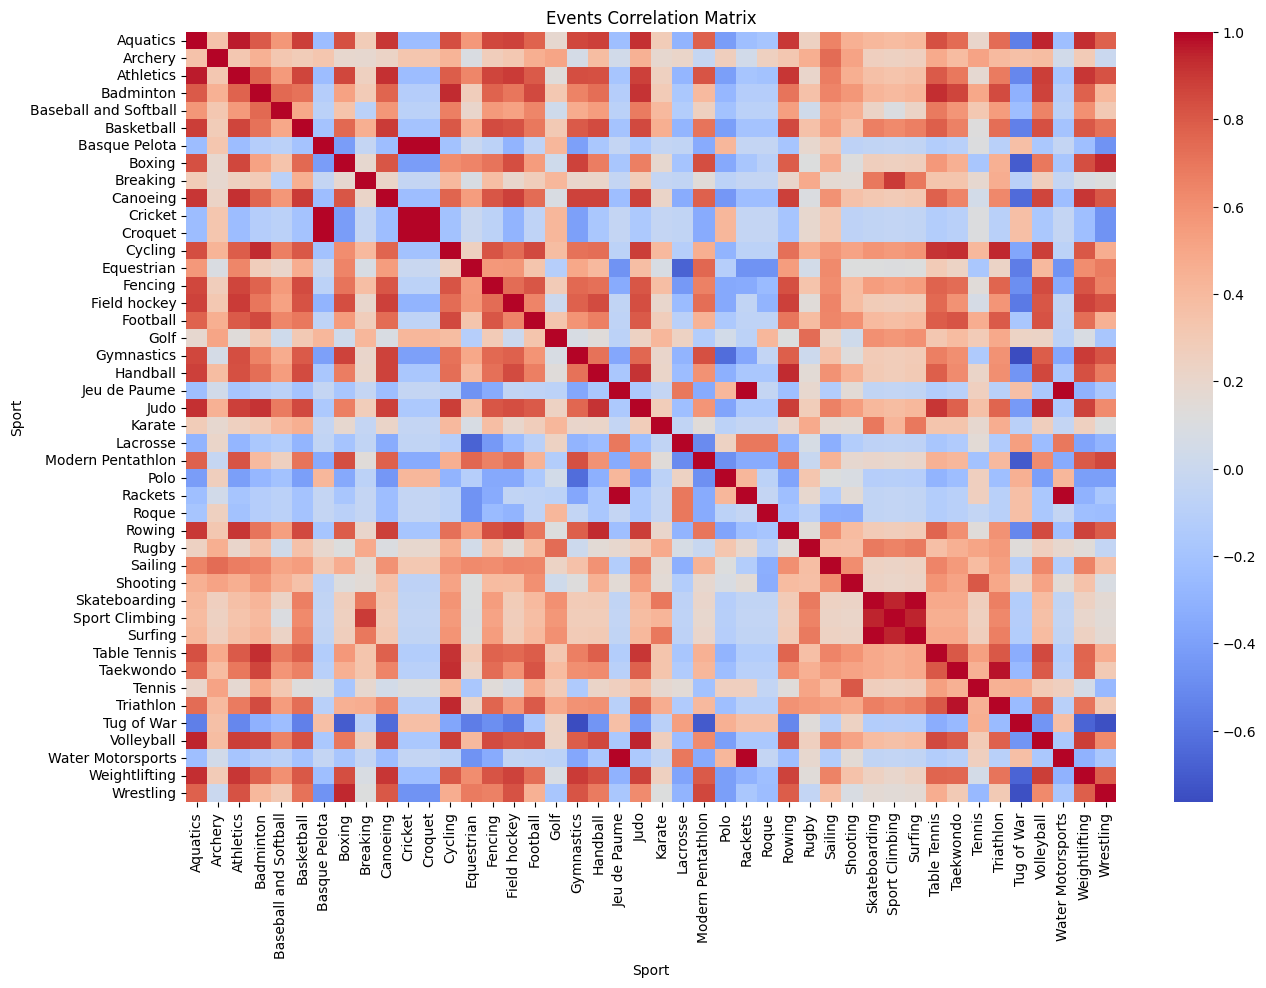

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = ['DejaVu Sans']


# 计算相关系数矩阵
correlation_matrix = programs_modified_transposed3.corr()
plt.figure(figsize=(15,10))
# 绘制相关性热图
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Events Correlation Matrix")
plt.show()


In [117]:
hasMedelCounts = pd.read_csv("Data/summerOly_medal_counts.csv") 
country = {}
for row in hasMedelCounts.itertuples():
    if row.NOC == "Mixed team":
        continue
    # if row.Rank >20:
    #     continue
    if row.NOC not in country:
        country[row.NOC]= {}
    country[row.NOC][row.Year] = (row.Gold,row.Silver,row.Bronze,row.Total)
print(len(country['United States']))

sortedcountry = sorted(country.items(), key = lambda x: len(x[1]),reverse=True)
print(sortedcountry)

Count = {}

selectedCountry = {}
for item in sortedcountry:
    if len(item[1])>21:
        selectedCountry[item[0]] = item[1]
    num = len(item[1])
    # print(item[0],num)
    # if num in Count:
    #     Count[num]+=1
    # else:
    #     Count[num]=1
# print(Count)

29
[('United States', {1896: (11, 7, 2, 20), 1900: (19, 14, 15, 48), 1904: (76, 78, 77, 231), 1908: (23, 12, 12, 47), 1912: (26, 19, 19, 64), 1920: (41, 27, 27, 95), 1924: (45, 27, 27, 99), 1928: (22, 18, 16, 56), 1932: (44, 36, 30, 110), 1936: (24, 21, 12, 57), 1948: (38, 27, 19, 84), 1952: (40, 19, 17, 76), 1956: (32, 25, 17, 74), 1960: (34, 21, 16, 71), 1964: (36, 26, 28, 90), 1968: (45, 28, 34, 107), 1972: (33, 31, 30, 94), 1976: (34, 35, 25, 94), 1984: (83, 61, 30, 174), 1988: (36, 31, 27, 94), 1992: (37, 34, 37, 108), 1996: (44, 32, 25, 101), 2000: (37, 24, 32, 93), 2004: (36, 39, 26, 101), 2008: (36, 39, 37, 112), 2012: (48, 26, 30, 104), 2016: (46, 37, 38, 121), 2020: (39, 41, 33, 113), 2024: (40, 44, 42, 126)}), ('France', {1896: (5, 4, 2, 11), 1900: (27, 39, 37, 103), 1904: (0, 1, 0, 1), 1908: (5, 5, 9, 19), 1912: (7, 4, 3, 14), 1920: (9, 19, 13, 41), 1924: (13, 15, 10, 38), 1928: (6, 10, 5, 21), 1936: (7, 6, 6, 19), 1948: (10, 6, 13, 29), 1952: (6, 6, 6, 18), 1956: (4, 4, 6,

In [118]:
from sklearn.linear_model import RidgeCV,LassoCV,Ridge
# model = LassoCV()
columns = list(programs_modified_transposed3.columns)
print(len(programs_modified_transposed3.columns))
columns.append("Country")
print(len(columns))
total_c = []
# print(selectedCountry)
for coun,value in selectedCountry.items():
    train_data = []
    train_label = []
    # programs_modified_transposed3[str(coun)+"totalMedel"] = None
    for year,medel in value.items():
        # print(type(year))
        train_data.append(programs_modified_transposed3.loc[str(year)])
        train_label.append(medel[3])
        # programs_modified_transposed3.loc(year,str(coun)+"totalMedel") = medel[3]
    model = Ridge(alpha=1.0,positive=True)
    # model = LassoCV(cv=5,positive=True)
    model.fit(train_data,train_label)
    c = model.coef_
    print(type(c))
    total_c.append(np.append(c,coun))
    
total_c = pd.DataFrame(total_c,columns=columns) 
print(total_c)
total_c.to_csv("processed_data/medelAevent.csv")   

44
45
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
   Aquatics             Archery Athletics           Badminton  \
0       0.0  0.5064870933083798       0.0                 0.0   
1       0.0                 0.0       0.0  2.1084879802511876   
2       0.0                 0.0       0.0                 0.0   
3       0.0                 0.0       0.0                 0.0   
4       0.0                 0.0       0.0                 0.0   
5       0.0                 0.0       0.0   0.875975080520798   
6       0.0                 0.0       0.0                 0.0   
7       0.0  0.7477280749084954       0.0                 0.0   
8       0.0                 0.0       0.0        

In [119]:
for _,row in total_c.iterrows():
    maxkey = None
    # print(row.keys())
    for key in row.keys():
        if key == "Country":
            continue
        if maxkey==None:
            maxkey= key
        if row[key]>row[maxkey]:
            maxkey = key
    print(row["Country"],maxkey,row[maxkey])

United States Golf 8.93412858156466
France Breaking 8.767207040727635
Great Britain Rugby 8.80071673109639
Denmark Rugby 1.485302844242647
Hungary Modern Pentathlon 3.721950211991615
Australia Lacrosse 2.1441066970354936e-06
Switzerland Skateboarding 8.055504744444058e-05
Belgium Polo 7.284370344133922
Italy Equestrian 3.4740491559058584
Canada Field hockey 3.6642694203791373
Sweden Polo 8.609626463150716
Austria Polo 3.420580354881871
Norway Tug of War 4.120308039395412
Netherlands Equestrian 1.679316375645972
Finland Tug of War 7.731621497245309
